# Constructing DataComp-Recap tfrecord files

In [1]:
import os
import tensorflow as tf
import requests
from datasets import load_dataset
import itertools
from tqdm import tqdm
from io import BytesIO
from PIL import Image

def download_image(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')  # Convert to RGB to ensure consistency
        width, height = img.size
        img_byte_arr = BytesIO()
        img.save(img_byte_arr, format='JPEG')
        return img_byte_arr.getvalue(), width, height
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return None, None, None

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def create_example(sample):
    image_data, width, height = download_image(sample['url'])
    if image_data is None:
        return None
    
    feature = {
        'image': _bytes_feature(image_data),
        'url': _bytes_feature(sample['url'].encode('utf-8')),
        're_caption': _bytes_feature(sample['re_caption'].encode('utf-8')),
        'org_caption': _bytes_feature(sample['org_caption'].encode('utf-8')),
        'width': _int64_feature(width),
        'height': _int64_feature(height),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

def convert_to_tfrecord(dataset, output_file):
    with tf.io.TFRecordWriter(output_file) as writer:
        for sample in tqdm(dataset):
            tf_example = create_example(sample)
            if tf_example is not None:
                writer.write(tf_example.SerializeToString())

# Load the dataset
ds = load_dataset("UCSC-VLAA/Recap-DataComp-1B", split="preview", streaming=True)

# Take the first n samples
limited_ds = itertools.islice(ds, 100)

# Convert the limited dataset to TFRecord
out_dir = "/home/austinwang/tensorflow_datasets/downloads"
out_path = os.path.join(out_dir, "datacomp_recap_train.tfrecord")
if not os.path.exists(out_dir): os.makedirs(out_dir) 
convert_to_tfrecord(limited_ds, out_path)

2024-09-24 05:35:35.784348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 05:35:35.807048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 05:35:35.814022: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 05:35:35.829488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 05:35:36.882559: W tensorflow/compiler/tf2

Error downloading https://media.istockphoto.com/vectors/christmas-balls-with-stripes-and-snowflakes-new-year-tree-decoration-vector-id621497892: 400 Client Error: Bad Request for url: https://media.istockphoto.com/vectors/christmas-balls-with-stripes-and-snowflakes-new-year-tree-decoration-vector-id621497892


17it [00:06,  2.98it/s]

Error downloading http://img.cricketworld.com/images/c-045629/sharuban-kanthasamy.jpg: 403 Client Error: Forbidden for url: http://img.cricketworld.com/images/c-045629/sharuban-kanthasamy.jpg


23it [00:08,  3.67it/s]

Error downloading https://www.northernsoul.me.uk/wp-content/uploads/2021/03/Lennie-Henry-pic-300x225.jpg: 404 Client Error: Not Found for url: https://www.northernsoul.me.uk/wp-content/uploads/2021/03/Lennie-Henry-pic-300x225.jpg


34it [00:09,  8.22it/s]

Error downloading https://s3.envato.com/files/251112560/IMG_0989.jpg: 403 Client Error: Forbidden for url: https://s3.envato.com/files/251112560/IMG_0989.jpg


40it [00:10,  8.09it/s]

Error downloading https://i2.wp.com/noticieros.televisa.com/wp-content/uploads/2017/11/moodys-rebaja-la-nota-crediticia-de-pdvsa-por-incumplimiento-de-pago.jpg?resize=340%2C194&quality=95&ssl=1: 400 Client Error: Bad Request for url: https://i2.wp.com/noticieros.televisa.com/wp-content/uploads/2017/11/moodys-rebaja-la-nota-crediticia-de-pdvsa-por-incumplimiento-de-pago.jpg?resize=340%2C194&quality=95&ssl=1


49it [00:13,  3.38it/s]

Error downloading https://www.vicky-mar.com/wp-content/uploads/nc/vickymar/catalogs/mums-of-brides/8058-D-02-P.jpg: 404 Client Error: Not Found for url: https://www.vicky-mar.com/wp-content/uploads/nc/vickymar/catalogs/mums-of-brides/8058-D-02-P.jpg


51it [00:13,  3.02it/s]

Error downloading https://cdn.trendhunterstatic.com/phpthumbnails/193/193415/193415_3_80.jpeg: 404 Client Error: Not Found for url: https://cdn.trendhunterstatic.com/phpthumbnails/193/193415/193415_3_80.jpeg


56it [00:14,  4.78it/s]

Error downloading https://www.specsserver.com/CACHE/FROGQWYXAOEU.PNG?width=220&height=220&ccid=x8dff32d: 403 Client Error: Forbidden for url: https://www.specsserver.com/CACHE/FROGQWYXAOEU.PNG?width=220&height=220&ccid=x8dff32d


60it [00:15,  6.44it/s]

Error downloading https://www.tasteofhome.com/wp-content/uploads/2018/01/exps35009_RDS2028402D05_06_6b_WEB-2.jpg?fit=300,300: 403 Client Error: Forbidden for url: https://www.tasteofhome.com/wp-content/uploads/2018/01/exps35009_RDS2028402D05_06_6b_WEB-2.jpg?fit=300,300


79it [00:18,  6.09it/s]

Error downloading http://www.pumpupyourbook.com/wp-content/uploads/2010/06/The-Book-of-Unholy-Mischief-183x300.jpg: 406 Client Error: Not Acceptable for url: http://www.pumpupyourbook.com/wp-content/uploads/2010/06/The-Book-of-Unholy-Mischief-183x300.jpg


80it [00:19,  4.72it/s]

Error downloading http://www.supercoloring.com/sites/default/files/styles/coloring_medium/public/cif/2016/06/citroen-2-cv-coloring-page.png: 403 Client Error: Forbidden for url: https://www.supercoloring.com/sites/default/files/styles/coloring_medium/public/cif/2016/06/citroen-2-cv-coloring-page.png


87it [00:31,  1.52s/it]

Error downloading https://www.southerntrophyshop.com/images/p150x150/executive-gift-awards-BrNmFh.jpg: HTTPConnectionPool(host='107.167.170.110', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f53d9b79030>, 'Connection to 107.167.170.110 timed out. (connect timeout=10)'))


100it [00:34,  2.89it/s]


# Build TFDS in terminal

In [ ]:
"""
export TFDS_NAME=datacomp_recap
# export TFDS_DATA_DIR=gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets
export TFDS_DATA_DIR=~/tensorflow_datasets
export TFDS_BUILDER_DIR=~/austin_big_vision/big_vision/datasets
tfds build $TFDS_BUILDER_DIR/$TFDS_NAME --data_dir $TFDS_DATA_DIR
"""

# Inspect the tfds

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
dataset = tfds.load('datacomp_recap', split='train', batch_size=1,shuffle_files=True)
dataset

2024-09-24 17:02:19.678464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 17:02:19.700600: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 17:02:19.707374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 17:02:19.722772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 17:02:20.776259: W tensorflow/compiler/tf2

<_PrefetchDataset element_spec={'height': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), 'org_caption': TensorSpec(shape=(None,), dtype=tf.string, name=None), 're_caption': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'url': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'width': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

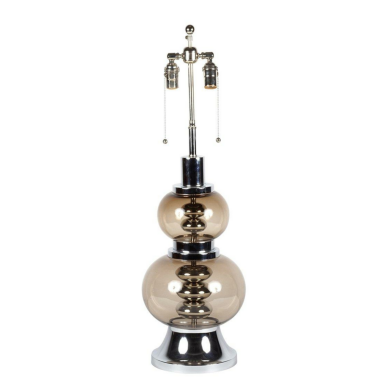

original caption: [b'Glass table lamp']
recaptioned caption: [b'A modern glass lamp with a metallic base and a single light bulb is displayed against a white background.']


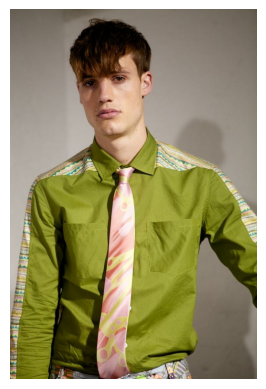

original caption: [b'Fashion East Menswear']
recaptioned caption: [b'A young man with short hair is wearing a green shirt with a patterned collar and a pink and yellow striped tie. He has a neutral expression on his face.']


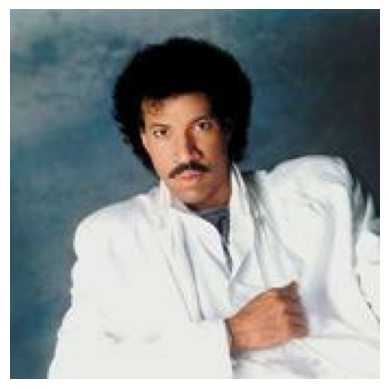

original caption: [b'Lionel Richie']
recaptioned caption: [b'A man with a full afro hairstyle wearing a white suit jacket and a white shirt.']


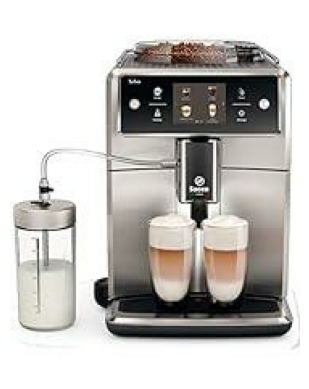

original caption: [b'Saeco Xelsis Automatic Espresso Machine, SM7685/04, Stainless Steel']
recaptioned caption: [b'A modern coffee machine with a digital display and two white coffee cups filled with coffee is shown. The machine has a stainless steel finish and is accompanied by a milk frothing pitcher with a white liquid inside. The coffee machine is placed on a surface with a white background.']


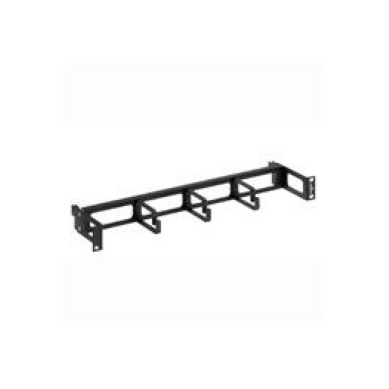

original caption: [b'Cable Manager, Horizontal, Recessed Flat, 3-Ring, Rack Mount, 1RU, 19" Width x 4.8" Depth x 1.72" Height, 16 Gauge Steel, Powder Coated Black, With 3" Metal D-Ring']
recaptioned caption: [b'A black metal shelf with a simple design, featuring a flat top and a straight, rectangular frame with square supports. The shelf is mounted on a white background, and there are no visible screws or hardware.']


2024-09-24 17:02:23.334245: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [2]:
count = 5
for batch in dataset:
    # img = tf.image.decode_jpeg(batch['image'][0])
    img = batch['image'][0]
    plt.imshow(img.numpy())
    plt.axis('off')
    plt.show()
    print(f"original caption: {batch['org_caption'].numpy()}")
    print(f"recaptioned caption: {batch['re_caption'].numpy()}")
    count -= 1
    if count == 0:
        break